# Data Analysis Project T2 2024

## Exercise 1

### 1. Data Preperation

In [122]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [123]:
#Load dataset
data = pd.read_csv('Walmart_sales.csv')

data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [124]:
#Dataset info
print("The Dataset consists of: ", data.shape[0], " rows and ", data.shape[1], " columuns")

print("\n\nCheck for null values and data types\n")
print(data.info())
print(data.describe())

print("\nnumber of unique store values\n")
print(data.nunique())

The Dataset consists of:  6435  rows and  8  columuns


Check for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020 

In [125]:
# Checking what actually a row means
is_duplicated = data.duplicated(subset=['Store', 'Date']).any()
print ("There are multiple rows with same store number and date:",is_duplicated)

There are multiple rows with same store number and date: False


Therefore, we can consider that each row consists of data of a certain store in a specific week.

In [126]:
# Drop 'Fuel_Price' and 'Unemployment' columns (not needed for this task)
data.drop(['Fuel_Price', 'Unemployment'], axis=1, inplace=True)

In [127]:
# Convert date column to datetime datatype.
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
print(data['Date'].dtype)

data.head()

datetime64[ns]


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,CPI
0,1,2010-02-05,1643690.90,0,42.31,211.096358
1,1,2010-02-12,1641957.44,1,38.51,211.242170
2,1,2010-02-19,1611968.17,0,39.93,211.289143
3,1,2010-02-26,1409727.59,0,46.63,211.319643
4,1,2010-03-05,1554806.68,0,46.50,211.350143


In [128]:
# Convert store to string
data[['Store']] = data[['Store']].astype(str)

In [129]:
# Remove duplicates
duplicate_count = data[data.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)

Duplicates found:  0


In [130]:
# Check for missing data
missing_data = data.isnull().sum()
print("Number of missing data(null values):")
print(missing_data)

Number of missing data(null values):
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
CPI             0
dtype: int64


In [131]:
# Save cleaned dataset to a CSV
data.to_csv('cleaned_dataset.csv', index=False)

### 2. Product Performance Analysis

#### Average weekly sales by store and holiday flag


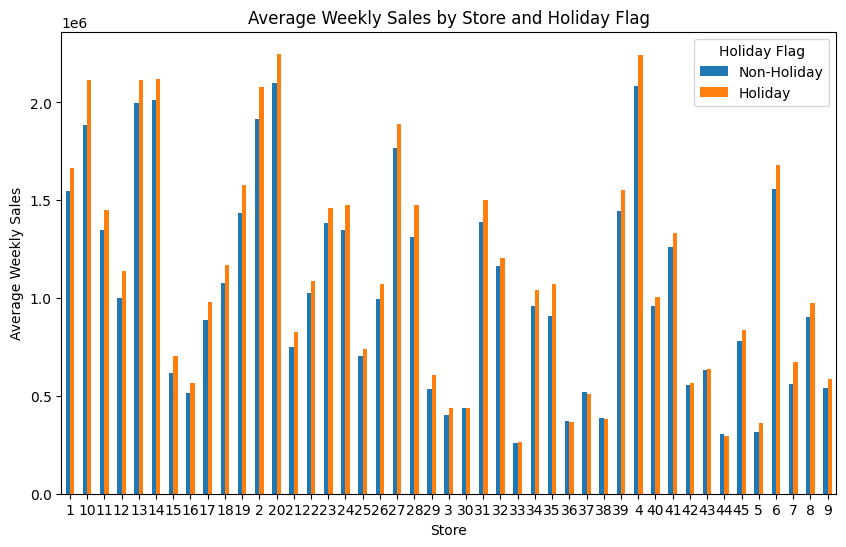

In [132]:
#Group by store and holiday flag
avg_sales = data.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().unstack()

# Plotting the average weekly sales by store and holiday flag
avg_sales.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Average Weekly Sales by Store and Holiday Flag')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.legend(title='Holiday Flag', labels=['Non-Holiday', 'Holiday'])

# Display the plot
plt.show()

#### Analyse the trend of weekly sales over time for a single store

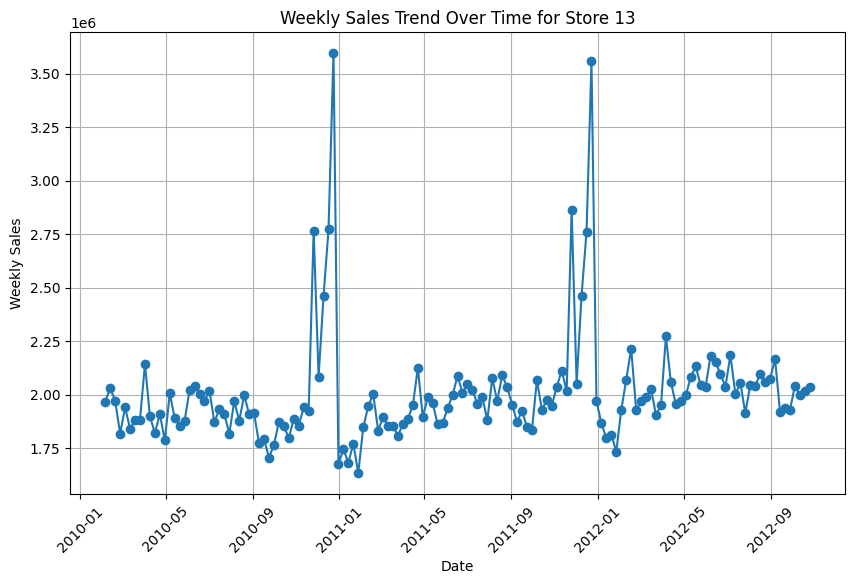

In [136]:
store_id = '13'
store_data = data[data['Store'] == store_id]

# Plotting the weekly sales trend over time for the store
plt.figure(figsize=(10, 6))
plt.plot(store_data['Date'], store_data['Weekly_Sales'], marker='o', linestyle='-')

plt.title(f'Weekly Sales Trend Over Time for Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Sales Trends Analysis

#### Sales trends over a month

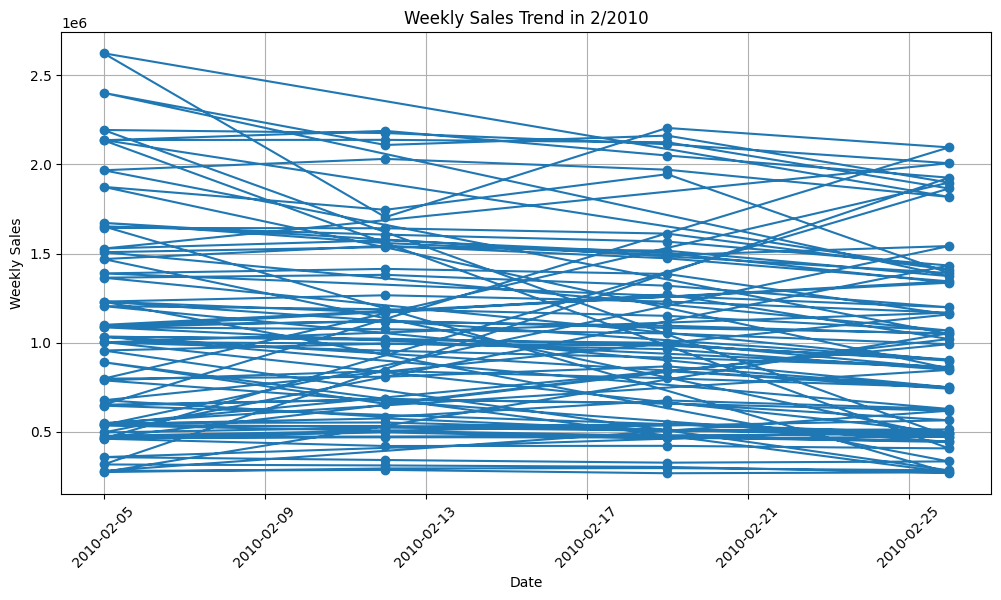

In [134]:
year = 2010
month = 2

# Filter the data for the selected month and year
filtered_data = data[(data['Date'].dt.year == year) & (data['Date'].dt.month == month)]

# Plotting the weekly sales trend over the month
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Weekly_Sales'], marker='o', linestyle='-')


plt.title(f'Weekly Sales Trend in {month}/{year}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



#### Analysing seasonality trends over seasons

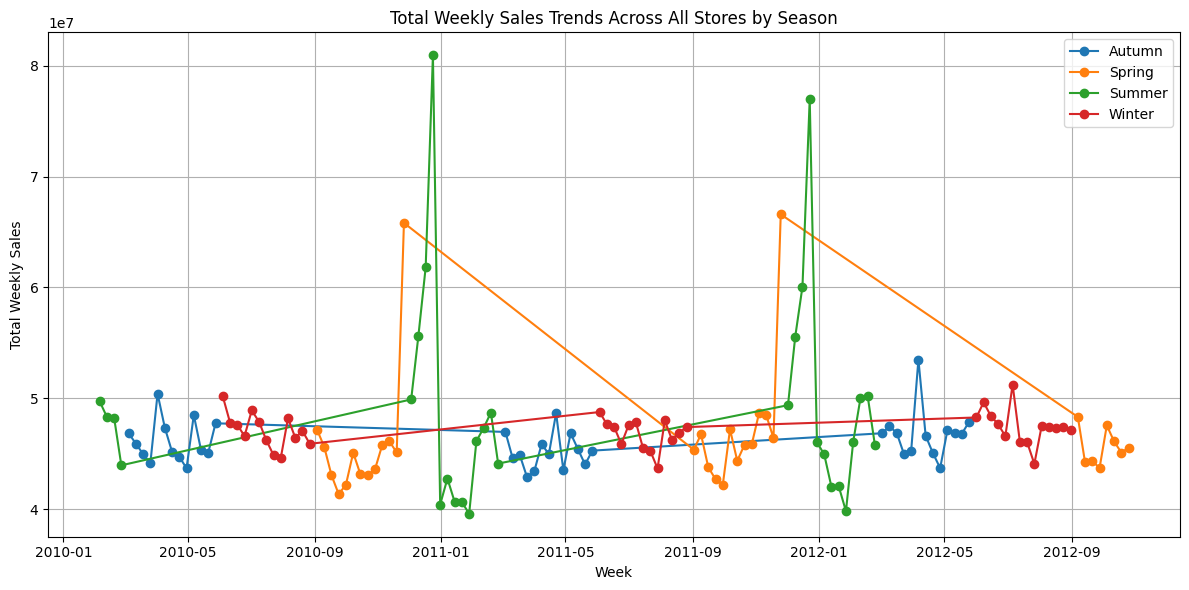

In [135]:
#Assuming its an Australian Dataset and considering australian seasons
def date_to_season(date):
    month = date.month
    
    if month in [9, 10, 11]:
        return "Spring"
    elif month in [12, 1, 2]:
        return "Summer"
    elif month in [3, 4, 5]:
        return "Autumn"
    else:
        return "Winter"

data['Season'] = data['Date'].apply(date_to_season)
    
total_weekly_sales_by_season = data.groupby(['Season', 'Date'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))

# Line for each season
for season, sales in total_weekly_sales_by_season.groupby('Season'):
    plt.plot(sales['Date'], sales['Weekly_Sales'], marker='o', linestyle='-', label=season)


plt.title('Total Weekly Sales Trends Across All Stores by Season')
plt.xlabel('Week')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()